In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv

In [3]:
df = read_csv("../../datasets/AFG_DATA.csv")
df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735


In [4]:
cdf = df[['Year', 'Life expectancy at birth (years)']]
cdf.describe()

,Year,Life expectancy at birth (years)
count,59.000000,58.000000
mean,1989.000000,48.663983
std,17.175564,9.879001
min,1960.000000,32.446000
25%,1974.500000,39.700500
50%,1989.000000,49.285000
75%,2003.500000,57.149250
max,2018.000000,64.130000


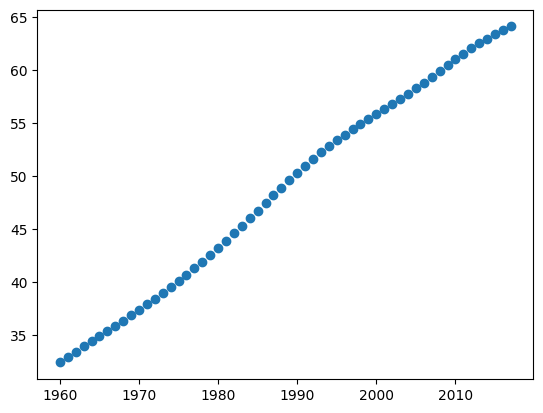

In [5]:
plt.scatter(df['Year'], cdf['Life expectancy at birth (years)'])
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures

msk = np.random.rand(len(cdf)) < 0.8
train_data = cdf[msk]
test_data = cdf[~msk]

train_x = np.asanyarray(train_data['Year']).reshape(-1,1)
train_y = np.asanyarray(train_data['Life expectancy at birth (years)'])

train_x = np.delete(train_x, 0).reshape(-1,1)
train_y = np.delete(train_y, 0)

test_x = np.asanyarray(test_data['Year']).reshape(-1,1)
test_y = np.asanyarray(test_data['Life expectancy at birth (years)'])

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_y

array([64.13 , 63.763, 63.377, 62.966, 62.054, 61.028, 59.93 , 59.375,
       58.826, 58.29 , 57.772, 57.271, 56.784, 56.308, 55.841, 55.376,
       54.906, 54.424, 53.924, 53.398, 52.842, 52.256, 51.641, 50.331,
       49.64 , 48.93 , 47.486, 46.04 , 45.324, 44.617, 43.923, 43.244,
       42.585, 41.32 , 40.715, 40.128, 39.558, 39.003, 38.461, 37.93 ,
       37.409, 36.9  , 35.914, 34.948, 34.463, 33.971, 33.471, 32.446])

In [7]:
from sklearn import linear_model

print(train_y)
clf = linear_model.LinearRegression()
train_Y_ = clf.fit(train_x_poly, train_y)
print(clf.coef_)
print(clf.intercept_)

[64.13  63.763 63.377 62.966 62.054 61.028 59.93  59.375 58.826 58.29
 57.772 57.271 56.784 56.308 55.841 55.376 54.906 54.424 53.924 53.398
 52.842 52.256 51.641 50.331 49.64  48.93  47.486 46.04  45.324 44.617
 43.923 43.244 42.585 41.32  40.715 40.128 39.558 39.003 38.461 37.93
 37.409 36.9   35.914 34.948 34.463 33.971 33.471 32.446]
[ 0.00000000e+00 -1.29530043e+03  6.52647793e-01 -1.09559663e-04]
856542.9759957787


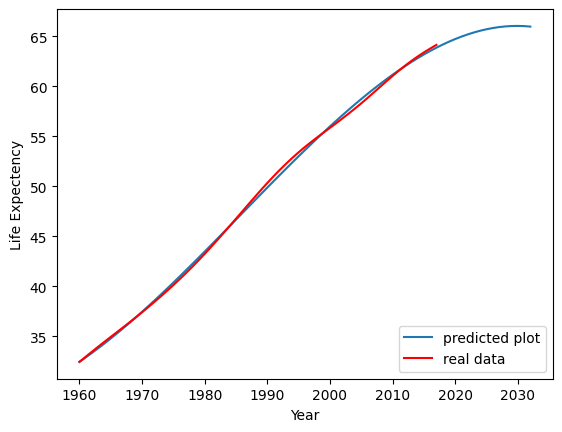

In [10]:
xx = np.arange(min(cdf['Year']), max(cdf['Year'])+15).reshape(-1,1)
yy = clf.predict(poly.transform(xx))

plt.plot(xx, yy, label="predicted plot")
plt.plot(cdf['Year'], cdf['Life expectancy at birth (years)'], color='red', label="real data")
plt.xlabel("Year")
plt.ylabel("Life Expectency")
plt.legend(loc="lower right")
plt.show()

In [19]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(r2_score(test_y, test_y_))

0.9991122078608806
